In [15]:
import numpy as np  # linear alg
import pandas as pd  # data processing 
import os
from glob import glob  # file searching
%matplotlib inline
import matplotlib.pyplot as plt  # plotting

In [56]:
# Setting up access to the images and csv

PATH = os.path.abspath('./data')
SOURCE_IMAGES = os.path.join(PATH, "images")
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))
#xray_labels_df = pd.read_csv(os.path.join(PATH, 'sample_labels.csv'))
xray_labels_df = pd.read_csv(os.path.join(PATH, 'Data_Entry_2017.csv'))

In [57]:
all_image_paths = {os.path.basename(x): x for x in images}
image_names = [os.path.basename(x) for x in images]

# Removes rows from dataframe that do not have a corresponding image in the images folder.
xray_labels_df = xray_labels_df[xray_labels_df['Image Index'].isin(image_names)]

# Drop images with multiple findings 
xray_labels_df = xray_labels_df[~xray_labels_df['Finding Labels'].str.contains('\|')]
print('Number of finding labels: {}'.format(len(xray_labels_df['Finding Labels'])))

# Add the path to all images to the dataframe
xray_labels_df['path'] = xray_labels_df['Image Index'].map(all_image_paths.get)
#xray_labels_df.sample(3)
xray_labels_df.head()

Number of finding labels: 12673


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,/Users/dennisi1/Code/school/csc665/term_projec...
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,/Users/dennisi1/Code/school/csc665/term_projec...
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,/Users/dennisi1/Code/school/csc665/term_projec...
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,/Users/dennisi1/Code/school/csc665/term_projec...
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,/Users/dennisi1/Code/school/csc665/term_projec...


In [10]:
xray_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5606 entries, 0 to 5605
Data columns (total 12 columns):
Image Index                    5606 non-null object
Finding Labels                 5606 non-null object
Follow-up #                    5606 non-null int64
Patient ID                     5606 non-null int64
Patient Age                    5606 non-null object
Patient Gender                 5606 non-null object
View Position                  5606 non-null object
OriginalImageWidth             5606 non-null int64
OriginalImageHeight            5606 non-null int64
OriginalImagePixelSpacing_x    5606 non-null float64
OriginalImagePixelSpacing_y    5606 non-null float64
path                           5606 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 569.4+ KB


In [13]:
# None of the numbers from the features are statistically interesting by themselves
xray_labels_df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,2644.795755,2491.087406,0.155467,0.155467
std,15.565815,8411.477789,347.188754,399.119063,0.016201,0.016201
min,0.000000,13.000000,1362.000000,966.000000,0.115000,0.115000
25%,0.000000,7289.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2542.000000,2544.000000,0.143000,0.143000
75%,10.000000,20655.500000,2992.000000,2991.000000,0.168000,0.168000
max,177.000000,30797.000000,3266.000000,3056.000000,0.198800,0.198800


Preprocessing:
-------------

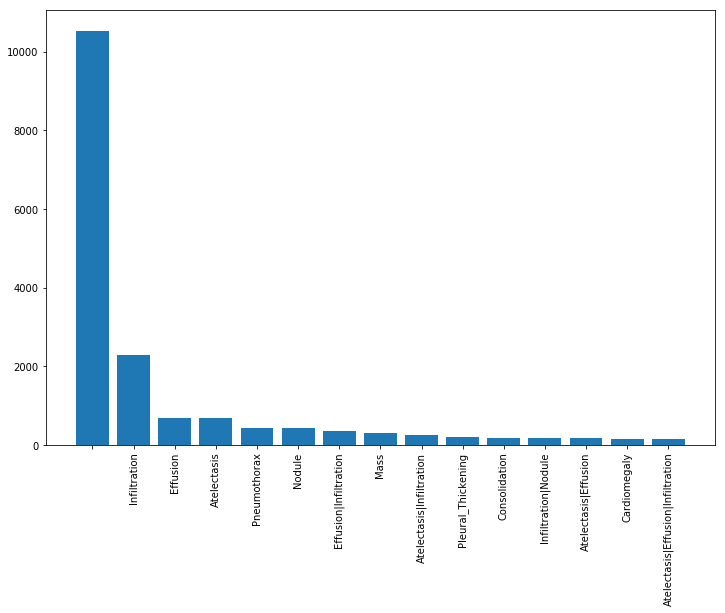

In [8]:
# Get the number of each type of disease classification
label_counts = xray_labels_df['Finding Labels'].value_counts()[:15]

# plot it
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
# Rotate and space out the labels to make them readable
ax1.bar(np.arange(len(label_counts)) + 1.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 1.5)
_ = ax1.set_xticklabels(label_counts.index, rotation=90)

# We should drop diagnosises with poor data set representation
# Those cases will probably train badly (based on the NIH paper)

In [14]:
from itertools import chain

# Replace Finding Labels with no finding to be blank
xray_labels_df['Finding Labels'] = xray_labels_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))

# Drop findings here

# Add columns to for each diagnosis to df
all_labels = np.unique(list(chain(*xray_labels_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]

# Adds attributes for each possible finding, and assigns value of 1.0 for each finding
# in the Finding Label (1-Hot Encoding)
for c_label in all_labels:
    if len(c_label) > 1:
        xray_labels_df[c_label] = xray_labels_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

print(all_labels)
xray_labels_df.sample(5)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
1259,00006642_014.png,Infiltration|Nodule,14,6642,059Y,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
394,00002048_010.png,,10,2048,041Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1861,00009804_000.png,,0,9804,005Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,00010475_040.png,Infiltration,40,10475,064Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2685,00013582_000.png,Fibrosis,0,13582,027Y,F,PA,2048,2500,0.168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
all_labels = [c_label for c_label in all_labels if xray_labels_df[c_label].sum() > 0]

print('Labels ({})'.format(len(all_labels)),
    [(c_label, int(xray_labels_df[c_label].sum())) for c_label in all_labels])

Labels (14) [('Atelectasis', 1938), ('Cardiomegaly', 397), ('Consolidation', 670), ('Edema', 366), ('Effusion', 2448), ('Emphysema', 366), ('Fibrosis', 178), ('Hernia', 27), ('Infiltration', 4225), ('Mass', 905), ('Nodule', 1175), ('Pleural_Thickening', 660), ('Pneumonia', 247), ('Pneumothorax', 1101)]


In [81]:
# Grouping diagnoses by age group. Value for each diagnoses is number of occurrences
# for the age group.
age_groups = (xray_labels_df.groupby(pd.cut(xray_labels_df['Patient Age'],
                                            [0, 10, 20, 30, 40, 50, 60, 70],
                                            right=False)).sum() )
age_groups

age_groups.drop(columns=['Follow-up #', 'Patient ID', 'Patient Age', 'OriginalImage[Width', 'Height]',
                         'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'])

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient Age,,,,,,,,,,,,,,
"[0, 10)",16.0,10.0,15.0,7.0,15.0,0.0,0.0,0.0,82.0,1.0,13.0,2.0,9.0,4.0
"[10, 20)",74.0,19.0,29.0,18.0,111.0,8.0,4.0,0.0,211.0,34.0,52.0,29.0,12.0,54.0
"[20, 30)",195.0,47.0,99.0,57.0,284.0,75.0,11.0,1.0,657.0,87.0,139.0,61.0,31.0,165.0
"[30, 40)",207.0,59.0,92.0,52.0,284.0,41.0,19.0,0.0,618.0,88.0,129.0,94.0,39.0,147.0
"[40, 50)",340.0,70.0,129.0,78.0,430.0,35.0,33.0,1.0,806.0,189.0,249.0,99.0,38.0,202.0
"[50, 60)",534.0,86.0,139.0,84.0,675.0,90.0,52.0,6.0,926.0,228.0,328.0,188.0,54.0,280.0
"[60, 70)",391.0,75.0,110.0,47.0,413.0,74.0,38.0,14.0,635.0,224.0,204.0,126.0,44.0,145.0


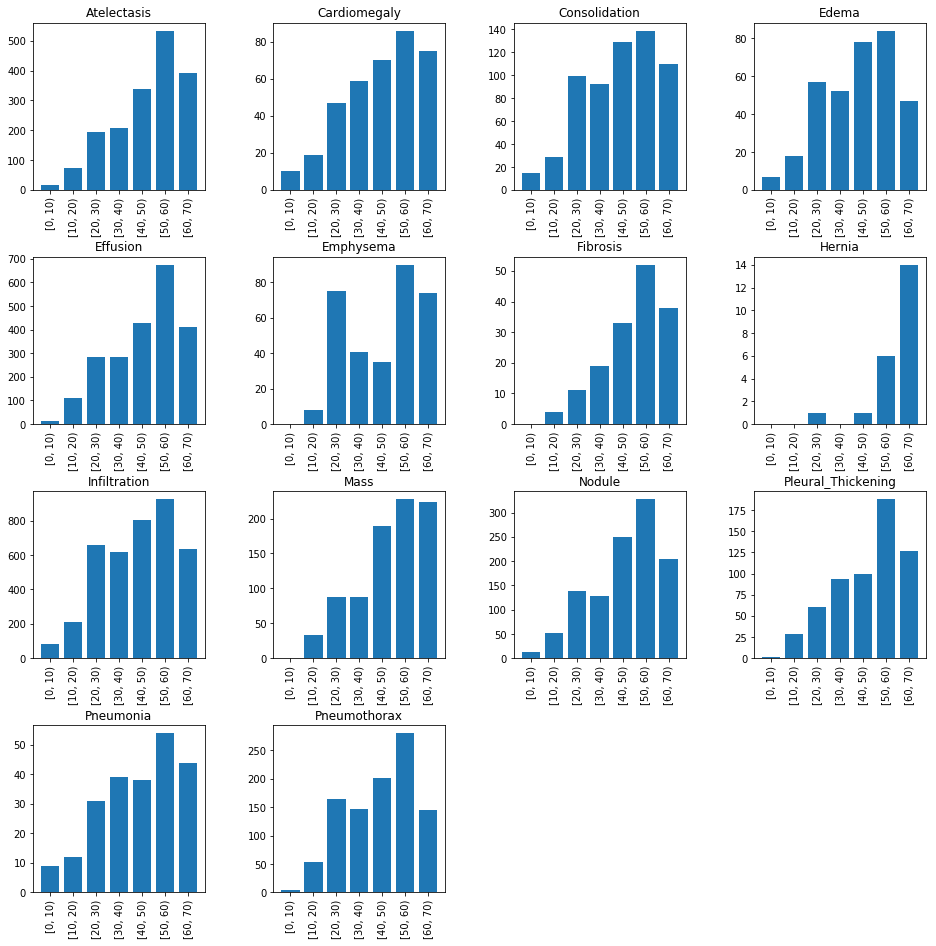

In [82]:
# Plots bar graphs that show number of occurrences of each diagnoses in each age group.
plt.figure(figsize=(16,16))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plot_num = 1
for label in all_labels:
    ax = plt.subplot(4,4, plot_num)
    ax.bar(np.arange(len(age_groups)) + 1.5, age_groups[label])
    ax.set_xticks(np.arange(len(age_groups)) + 1.5)
    _ = ax.set_xticklabels(age_groups.index, rotation = 90)
    ax.set_title(label)
    plot_num += 1

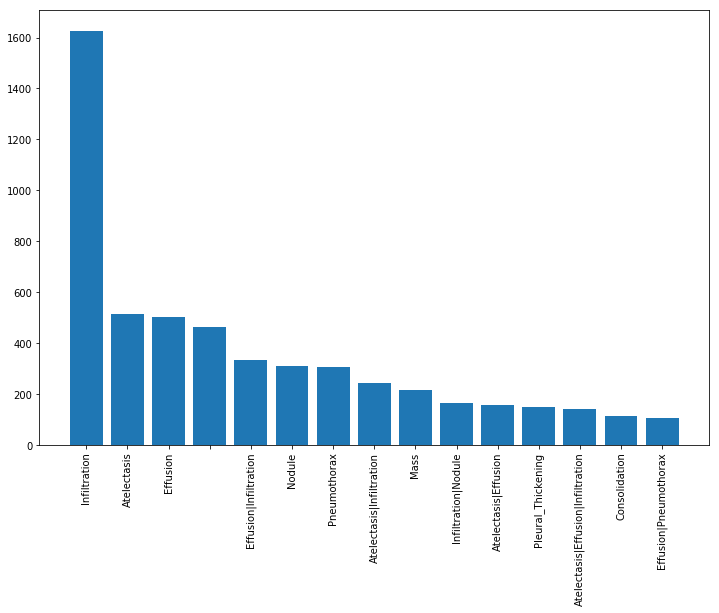

In [7]:
sample_weights = xray_labels_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x) > 0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
xray_labels_df = xray_labels_df.sample(8000, weights = sample_weights)

label_counts = xray_labels_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12,8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5) 
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

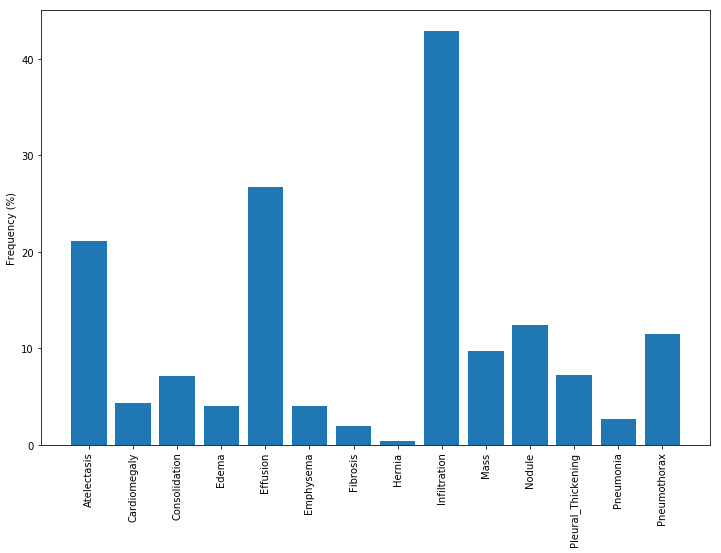

In [8]:
label_counts = 100*np.mean(xray_labels_df[all_labels].values, 0)
fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
_ = ax1.set_ylabel('Frequency (%)')

Preparing Training Data:
----------------------

In [9]:
# Creates disease vector with values 0 or 1 that model will predict.
xray_labels_df['disease_vec'] = xray_labels_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])


In [10]:
# Splitting data into training and validation sets.
from sklearn.model_selection import train_test_split
training_df, validation_df = train_test_split(xray_labels_df, 
                                              test_size = 0.25, 
                                              random_state = 2018,
                                              stratify = xray_labels_df['Finding Labels'].map(lambda x: x[:4]))

print('train', training_df.shape[0], 'validation', validation_df.shape[0])

train 6000 validation 2000


In [11]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip=True,
                              vertical_flip=True,
                              height_shift_range=0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range=0.1,
                              fill_mode='reflect',
                              zoom_range=0.15)

/anaconda3/envs/csc665/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    
    df_gen = img_data_gen.flow_from_directory(base_dir, class_mode='sparse', **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = ''
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    
    # df_gen is an iterator that yields a tuple (X,Y). 
    # X = batch of images, and Y = corresponding labels.
    return df_gen
    

In [24]:
# Generates training and validation data to be used by models.
training_gen = flow_from_dataframe(core_idg, training_df, path_col='path', y_col='disease_vec',target_size = IMG_SIZE, color_mode ='grayscale', batch_size = 32)
validation_gen = flow_from_dataframe(core_idg, validation_df, path_col='path', y_col='disease_vec',target_size = IMG_SIZE, color_mode ='grayscale', batch_size = 256)

test_X, test_Y = next(flow_from_dataframe(core_idg, validation_df, path_col ='path', y_col ='disease_vec', target_size = IMG_SIZE, color_mode = 'grayscale', batch_size = 1024))



Found 0 images belonging to 0 classes.
Reinserting dataframe: 6000 images
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2000 images
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2000 images


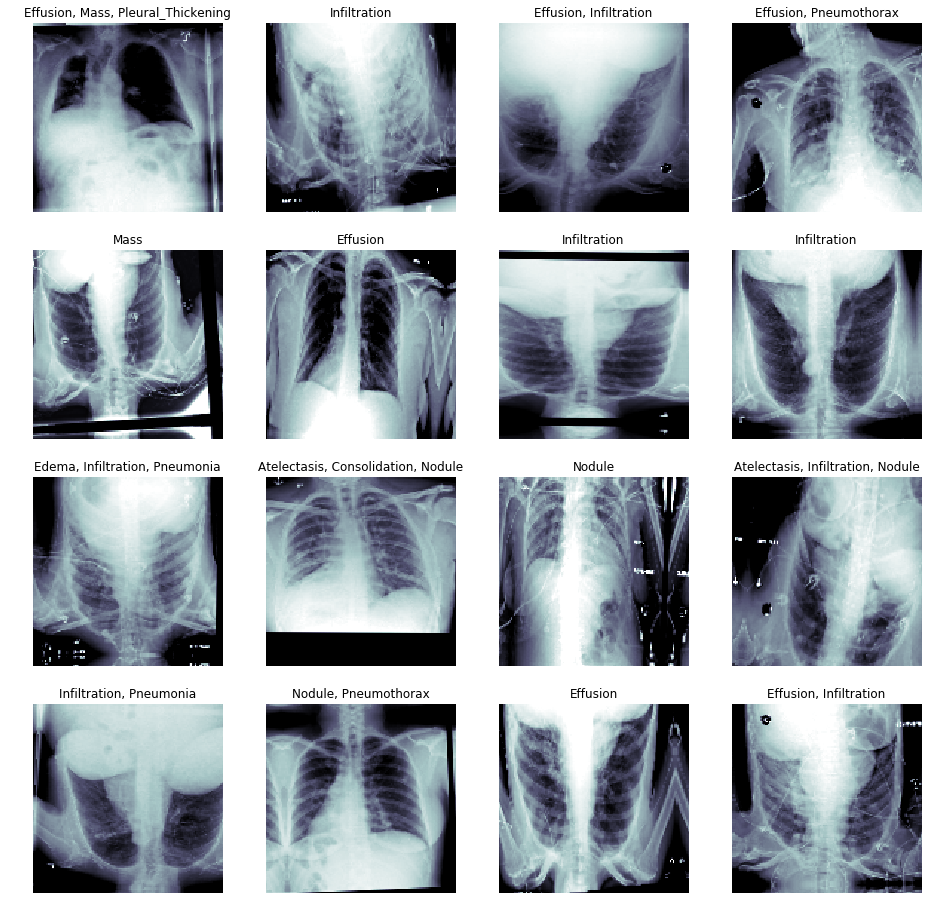

In [14]:
# Visualizing images and their corresponding diagnoses.
# t_x = images, t_y = labels
t_x, t_y = next(training_gen)
fig, m_axs = plt.subplots(4,4,figsize=(16,16))
for(c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap='bone', vmin=-1.5, vmax=1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) if n_score > 0.5]))
    c_ax.axis('off')

Model Creation:
--------------

In [26]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
import tensorflow as tf

base_mobilenet_model = MobileNet(input_shape = t_x.shape[1:],
                                 include_top = False, weights = None)

multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss ='binary_crossentropy',
                            metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228288   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 14)                7182      
Total params: 3,760,270
Trainable params: 3,738,382
Non-trainable params: 21,888
_____________________________________________________________

In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path = "{}_weights.best.hdf5".format("xray_class")

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [checkpoint, early]

In [27]:
multi_disease_model.fit_generator(training_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 1, 
                                  callbacks = callbacks_list)

Epoch 1/1
100/100 [==============================] - 509s 5s/step - loss: 0.4110 - binary_accuracy: 0.8708 - mean_absolute_error: 0.1771 - val_loss: 0.4801 - val_binary_accuracy: 0.8737 - val_mean_absolute_error: 0.1550

Epoch 00001: val_loss improved from inf to 0.48010, saving model to xray_class_weights.best.hdf5


In [28]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 21.09%
Cardiomegaly: 4.49%
Consolidation: 7.62%
Edema: 4.39%
Effusion: 27.64%
Emphysema: 3.22%
Fibrosis: 2.34%
Hernia: 0.49%
Infiltration: 43.36%
Mass: 10.35%
Nodule: 11.91%
Pleural_Thickening: 6.74%
Pneumonia: 3.12%
Pneumothorax: 10.06%


In [29]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 57s 56ms/step


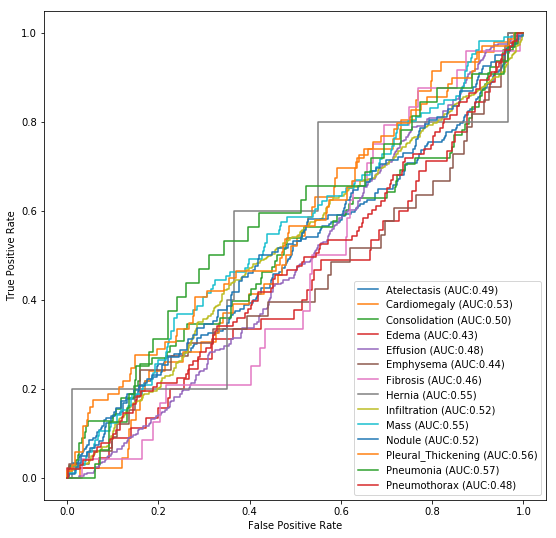

In [30]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [32]:
# Try removing data from dataframe that has multiple diagnoses.
# Train model, record results for Alvin's presentation
# Mess around with creating own CNN. Maybe model after DeepMind's CNN used for Q-Learning?

multi_disease_model.fit_generator(training_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 5, 
                                  callbacks = callbacks_list)

Epoch 1/5
100/100 [==============================] - 501s 5s/step - loss: 0.3545 - binary_accuracy: 0.8795 - mean_absolute_error: 0.1759 - val_loss: 0.5387 - val_binary_accuracy: 0.8880 - val_mean_absolute_error: 0.1399

Epoch 00001: val_loss did not improve
Epoch 2/5
100/100 [==============================] - 501s 5s/step - loss: 0.3186 - binary_accuracy: 0.8838 - mean_absolute_error: 0.1744 - val_loss: 0.3070 - val_binary_accuracy: 0.8844 - val_mean_absolute_error: 0.1653

Epoch 00002: val_loss improved from 0.48010 to 0.30700, saving model to xray_class_weights.best.hdf5
Epoch 3/5
100/100 [==============================] - 4067s 41s/step - loss: 0.3067 - binary_accuracy: 0.8848 - mean_absolute_error: 0.1749 - val_loss: 0.3051 - val_binary_accuracy: 0.8844 - val_mean_absolute_error: 0.1643

Epoch 00003: val_loss improved from 0.30700 to 0.30506, saving model to xray_class_weights.best.hdf5
Epoch 4/5
100/100 [==============================] - 510s 5s/step - loss: 0.2971 - binary_accur

In [33]:
multi_disease_model.load_weights(weight_path)

In [34]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)


1024/1024 [==============================] - 54s 52ms/step


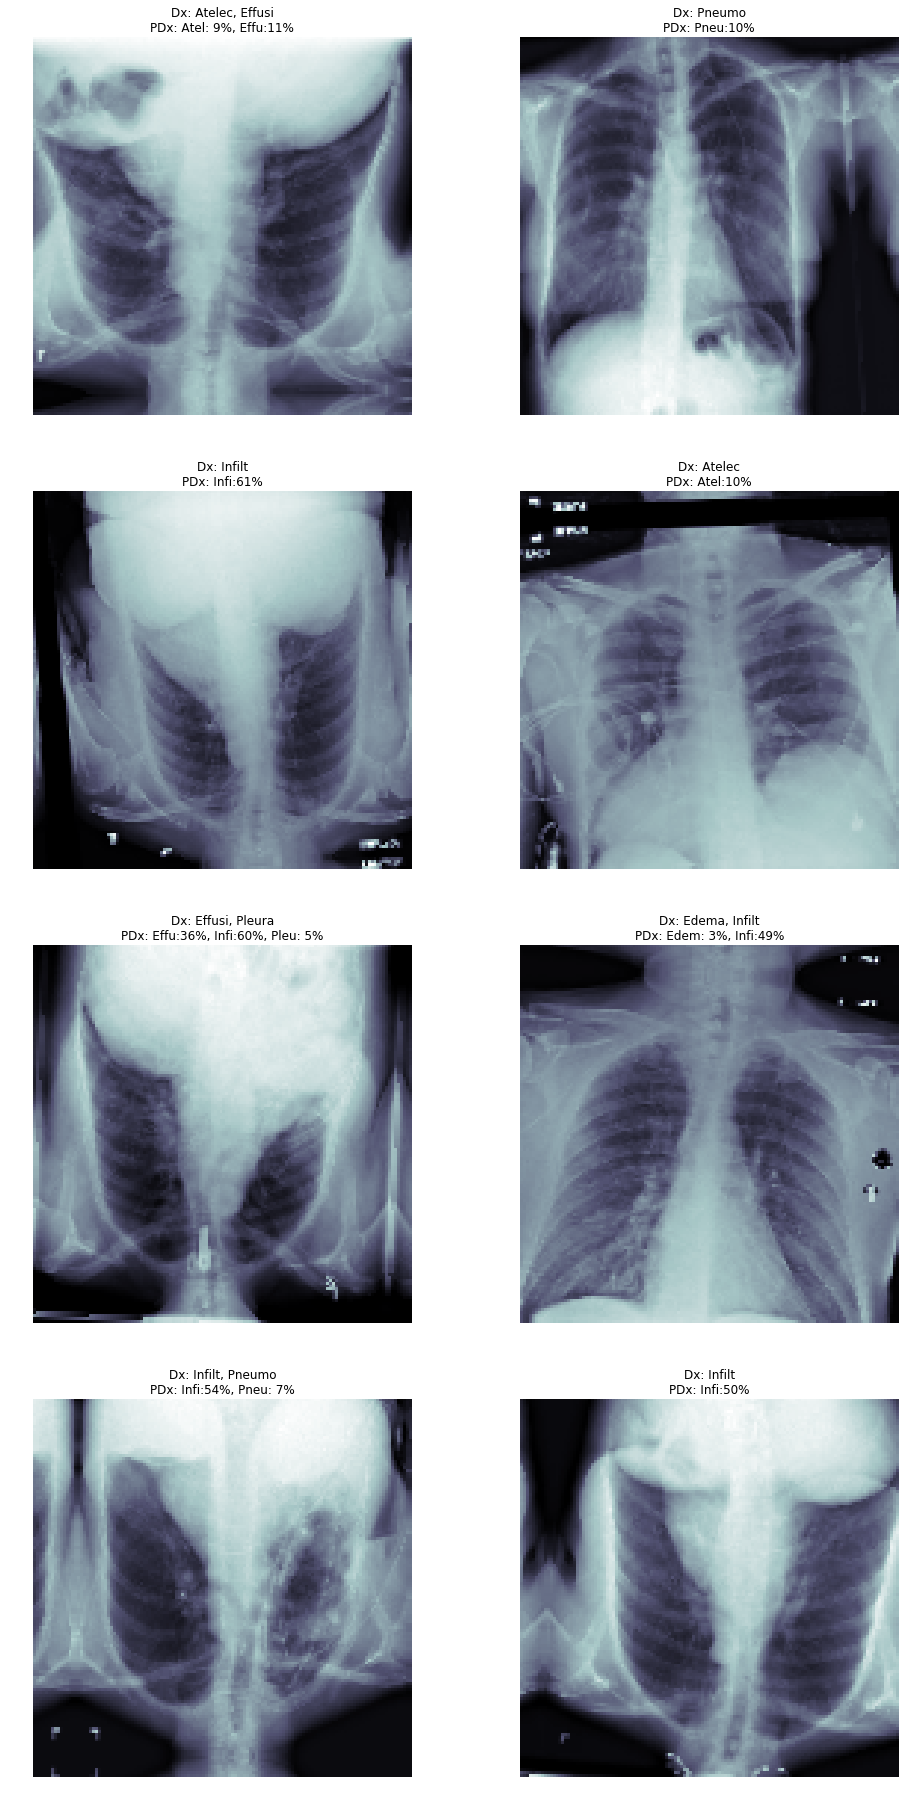

In [35]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')